In [ ]:
import os
import json
import requests
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Retrieve the csv data folder on your computer 
csv_file_path = os.path.expanduser("/Users/ceciliaacosta/IFT-DATASCIENCE/MILESTONE1_local/2019.csv")
print(csv_file_path)

# Check if the file exists
if os.path.exists(csv_file_path):
    # Read the CSV file into a Pandas DataFrame
    df = pd.read_csv(csv_file_path)

# Check for missing data in the entire DataFrame
missing_data = df.isna().sum()

# Check for missing data in a specific column (e.g., "result.secondaryType")
missing_data_in_column = df['result.secondaryType'].isna().sum()

# Print the results
print("Missing data in the entire DataFrame:")
print(missing_data)

In [ ]:
# Filter data for events of type "SHOT"
shot_data = df[df['result.eventTypeId'] == 'SHOT']

# Get unique team names
unique_teams = shot_data['team.name'].unique()

# Define colors for the legend
colors = ['blue', 'red']

# Group and aggregate data by secondaryType
grouped_data = shot_data.groupby(['result.secondaryType']).size()

# Calculate the number of goals for each type of shot
goal_data = df[df['result.eventTypeId'] == 'GOAL']
goal_counts = goal_data.groupby(['result.secondaryType']).size()

# Calculate the percentage of goals for each type of shot
total_shots = grouped_data + goal_counts
percentage_goals = (goal_counts / total_shots) * 100

# Create a DataFrame with the data
plot_data = pd.DataFrame({
    'Shots': grouped_data,
    'Goals': goal_counts,
    'Percentage Goals': percentage_goals
    })

# Set style for Seaborn
sns.set(style="whitegrid")

# Plot the data
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=plot_data.index, y=plot_data['Shots'], color='blue', label='Shots')
ax = sns.barplot(x=plot_data.index, y=plot_data['Goals'], color='red', label='Goals')

# Add percentage values above the bar
for i, (sh, go, perc) in enumerate(zip(grouped_data, goal_counts, percentage_goals)):
    if not pd.isna(perc):
        perc_label = f'{perc:.1f}%'
        ax.text(i, max(sh, go) + 1, perc_label, ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
    else:
        perc_label = '0%'
        ax.text(i, max(sh, go) + 1, perc_label, ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
plt.xlabel('Shot Type')
plt.ylabel('Count')
plt.title(f'Shots and Goals for {team}')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

In [ ]:
# Filter data for events of type "SHOT"
shot_data = df[df['result.eventTypeId'] == 'SHOT']

# Get unique team names
unique_teams = shot_data['team.name'].unique()

# Initialize an empty list to store the "plot_data" DataFrames for each team
plot_data_list = []

# Loop through unique teams and create separate plots
for team in unique_teams:
    team_shot_data = shot_data[shot_data['team.name'] == team]

    # Group and aggregate data by secondaryType
    grouped_data = team_shot_data.groupby(['result.secondaryType']).size()

    # Calculate the number of goals for each type of shot
    goal_data = df[(df['result.eventTypeId'] == 'GOAL') & (df['team.name'] == team)]
    goal_counts = goal_data.groupby(['result.secondaryType']).size()

    # Calculate the percentage of goals for each type of shot
    total_shots = grouped_data + goal_counts
    percentage_goals = (goal_counts / total_shots) * 100

    # Create a DataFrame with the data
    plot_data = pd.DataFrame({
        'Shots': grouped_data,
        'Goals': goal_counts,
        'Percentage Goals': percentage_goals
        })

    # Append the "plot_data" DataFrame to the list
    plot_data_list.append(plot_data)

    # Now you have a list of "plot_data" DataFrames for each team
    # You can use this data to find the best shot type for each team

# For example, to find the best shot type for each team:
for i, team in enumerate(unique_teams):
    best_shot_type = plot_data_list[i]['Percentage Goals'].idxmax()
    print(f"Team: {team}, Best Shot Type: {best_shot_type}")

else:
    print(f"File not found: {csv_file_path}")

# Initialize a dictionary to store the best shot type for each team
best_shot_types_by_team = {}

# Iterate through the "plot_data_list" to find the best shot type for each team
for i, team in enumerate(unique_teams):
    team_data = plot_data_list[i]

    # Find the shot type with the highest percentage of goals for this team
    best_shot_type = team_data['Percentage Goals'].idxmax()
    best_shot_types_by_team[team] = best_shot_type

# Initialize a dictionary to count the number of teams for each shot type
count_shot_type_teams = {}

# Count how many teams have each shot type as the best
for team, best_shot_type in best_shot_types_by_team.items():
    if best_shot_type not in count_shot_type_teams:
        count_shot_type_teams[best_shot_type] = 1
    else:
        count_shot_type_teams[best_shot_type] += 1

# Print the count for each shot type
for shot_type, count in count_shot_type_teams.items():
    print(f"Shot Type: {shot_type}, Number of Teams with Best Percentage: {count}")

# Initialize a dictionary to store the most used shot type for each team
most_used_shot_type_by_team = {}

# Iterate through the "plot_data_list" to find the most used shot type for each team
for i, team in enumerate(unique_teams):
    team_data = plot_data_list[i]

    # Find the shot type with the highest count for this team
    most_used_shot_type = team_data['Shots'].idxmax()
    most_used_shot_type_by_team[team] = most_used_shot_type

# Print the most used shot type for each team
for team, most_used_shot_type in most_used_shot_type_by_team.items():
    print(f"Team: {team}, Most Used Shot Type: {most_used_shot_type}")

# Initialize a dictionary to count the number of teams for each shot type that is the most used
count_most_used_shot_type_teams = {}

# Iterate through the "plot_data_list" to find the most used shot type for each team
for i, team in enumerate(unique_teams):
    team_data = plot_data_list[i]

    # Find the shot type with the highest count for this team
    most_used_shot_type = team_data['Shots'].idxmax()

    # Increment the count for the most used shot type
    if most_used_shot_type not in count_most_used_shot_type_teams:
        count_most_used_shot_type_teams[most_used_shot_type] = 1
    else:
        count_most_used_shot_type_teams[most_used_shot_type] += 1

# Print the count for each shot type that is the most used
for shot_type, count in count_most_used_shot_type_teams.items():
    print(f"Shot Type: {shot_type}, Number of Teams with Most Used Type: {count}")

#Réponse pour la question 1 de la partie visualisation des données : Il est facile avec les graphiques par équipe de voir que le tir le plus effectué est le 'Wirst Shot' et c'est le cas pour toutes les équipes. Pour ce qui est du tir le plus efficace en terme de tirs qui occasionnent le plus de but nous avons deux types de tirs qui se démarquent : le 'Deflected' qui est le meilleur pour 13 équipes et le 'Tip-In' qui est le meilleur pour 12 équipes. Nous avons choici le bar plot justement parce qu'il est facile de voir en un seul coup d'oeil pour chaque équipe quels sont les tirs les plus utilisés et l'efficacité de chacun des types de tirs pour marquer des buts. 


In [ ]:
#Looking for average positive and negative x.coordinates for wrap-around shots which is the type of shot to be closest to goal line 
# Filter for 'tip-in' shots with positive coordinates.x
positive_tip_in = df[(df['result.secondaryType'] == 'Wrap-around') & (df['coordinates.x'] > 0)]

# Filter for 'tip-in' shots with negative coordinates.x
negative_tip_in = df[(df['result.secondaryType'] == 'Wrap-around') & (df['coordinates.x'] < 0)]

# Calculate the average coordinates.x for positive and negative tip-in shots
average_positive_wrapaound = positive_tip_in['coordinates.x'].mean()
average_negative_wraparound = negative_tip_in['coordinates.x'].mean()

print("Average coordinates.x for positive wrap around shots:", average_positive_wrapaound)
print("Average coordinates.x for negative wrap around shots:", average_negative_wraparound)

#This is a bit atypical because a wrap around shot is right on the goal line usually which should be at -89 and 89 feet

#Knowing that both goals are centered, the center point of each goal is assumed to be (89,0) and (-89,0)
#We will also assume that every shot is made towards the goal in the same x side of the ice 

# Assuming the goals are at (89, 0) and (-89, 0)
goal_1 = (89, 0)
goal_2 = (-89, 0)

# Calculate Euclidean distance for shots directed at Goal 1 (positive X)
positive_x_shots = df[df['coordinates.x'] > 0]
positive_x_shots['distance_to_goal'] = np.sqrt(
    (positive_x_shots['coordinates.x'] - goal_1[0])**2 + (positive_x_shots['coordinates.y'] - goal_1[1])**2)

# Calculate Euclidean distance for shots directed at Goal 2 (negative X)
negative_x_shots = df[df['coordinates.x'] < 0]
negative_x_shots['distance_to_goal'] = np.sqrt(
    (negative_x_shots['coordinates.x'] - goal_2[0])**2 + (negative_x_shots['coordinates.y'] - goal_2[1])**2)

# Combine the two dataframes
combined_data = pd.concat([positive_x_shots, negative_x_shots])

# Create a new column to mark if the shot resulted in a goal
combined_data['goal_scored'] = combined_data.apply(lambda row: row['result.eventTypeId'] == 'GOAL', axis=1)

# Group the data by distance and calculate the success rate
success_rates = combined_data.groupby('distance_to_goal')['goal_scored'].mean().reset_index()

# Use Seaborn to create a single graph with both lines
plt.figure(figsize=(10, 6))
sns.lineplot(x='distance_to_goal', y='goal_scored', data=success_rates)
plt.title("Success Rate vs. Distance to Goals")
plt.xlabel("Distance to Goal")
plt.ylabel("Success Rate")
plt.grid()
plt.show()


/var/folders/sk/v4vrhsvs23x5m4l_yhw9ckjw0000gn/T/ipykernel_59176/632050431.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_x_shots['distance_to_goal'] = np.sqrt(
/var/folders/sk/v4vrhsvs23x5m4l_yhw9ckjw0000gn/T/ipykernel_59176/632050431.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_x_shots['distance_to_goal'] = np.sqrt(


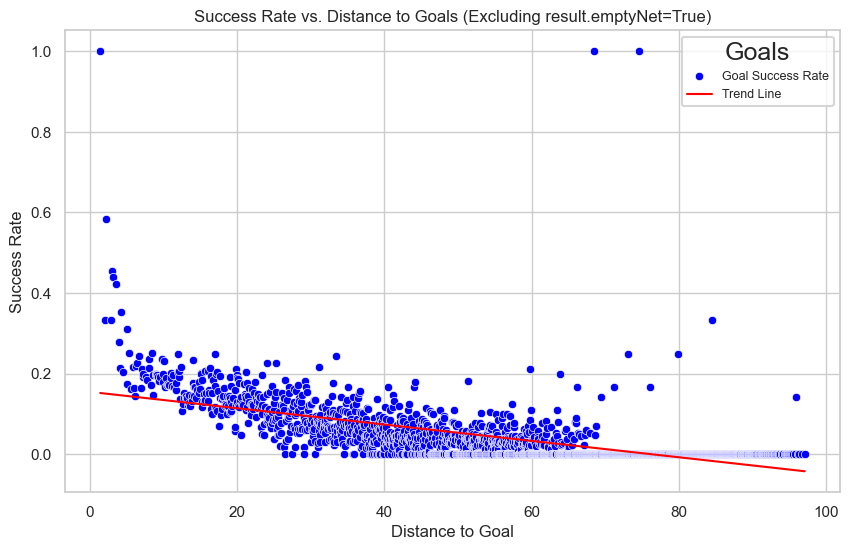

In [3]:

#Probably that the high success rate from the shots from far away are that players only try this type of shots when there is an empty net
# Filter the DataFrame to exclude shots with 'result.emptyNet' set to True
non_empty_net_shots = df[df['result.emptyNet'] != True]

# Calculate Euclidean distance for shots directed at Goal 1 (positive X)
positive_x_shots = non_empty_net_shots[non_empty_net_shots['coordinates.x'] > 0]
positive_x_shots['distance_to_goal'] = np.sqrt(
    (positive_x_shots['coordinates.x'] - goal_1[0])**2 + (positive_x_shots['coordinates.y'] - goal_1[1])**2)

# Calculate Euclidean distance for shots directed at Goal 2 (negative X)
negative_x_shots = non_empty_net_shots[non_empty_net_shots['coordinates.x'] < 0]
negative_x_shots['distance_to_goal'] = np.sqrt(
    (negative_x_shots['coordinates.x'] - goal_2[0])**2 + (negative_x_shots['coordinates.y'] - goal_2[1])**2)

# Combine the two dataframes
combined_data = pd.concat([positive_x_shots, negative_x_shots])

# Create a new column to mark if the shot resulted in a goal
combined_data['goal_scored'] = combined_data.apply(lambda row: row['result.eventTypeId'] == 'GOAL', axis=1)

# Group the data by distance and calculate the success rate
success_rates = combined_data.groupby('distance_to_goal')['goal_scored'].mean().reset_index()

# Use Seaborn to create a single graph with both lines and customize the style
plt.figure(figsize=(10, 6))

sns.scatterplot(x='distance_to_goal', y='goal_scored', data=success_rates, label='Goal Success Rate', color='blue')
plt.title("Success Rate vs. Distance to Goals (Excluding result.emptyNet=True)")
plt.xlabel("Distance to Goal")
plt.ylabel("Success Rate")

# Calculate the trend line using linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(success_rates['distance_to_goal'], success_rates['goal_scored'])

# Plot the trend line in red
x = np.array(success_rates['distance_to_goal'])
plt.plot(x, intercept + slope * x, color='red', label='Trend Line'
         )

# Customize the grid style
sns.set_style("whitegrid")

# Set font size and style
sns.set_context("talk")

# Add a legend
plt.legend(title='Goals', fontsize=9)

# Save the graph as an image (optional)
plt.savefig("beautiful_graph.png")
plt.show()

### HeatMap

In [1]:
# Define the distance bins
distance_bins = [0, 20, 40, 60, 80, 100]

# Create a new column for the distance bin
combined_data['distance_bin'] = pd.cut(
    combined_data['distance_to_goal'],
    bins=distance_bins,
    labels=['0-20', '20-40', '40-60', '60-80', '80-100']
)

# Group the data by shot type and distance bin and calculate the success rate
success_rates = combined_data.groupby(['result.secondaryType', 'distance_bin'])['goal_scored'].mean().reset_index()

# Create a pivot table for the heatmap
pivot_table = success_rates.pivot_table(index='result.secondaryType', columns='distance_bin', values='goal_scored')

# Use Seaborn to create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar=True)
plt.title("Goal Success Rate vs. Distance to Goal and Shot Type")
plt.xlabel("Distance to Goal (ft)")
plt.ylabel("Shot Type")

# Customize the grid style
sns.set_style("whitegrid")

# Set font size and style
sns.set_context("talk")
plt.show()

#Réponse partie 3 : En général, plus un tir est effectué près du filet, plus il a de chance d'être efficace. Il semble y avoir une erreur dans le data set car c'est un tir normalement effectué près du gardien en 'rebond' sur un tir précédant normalement et ne serait très peu probablement effectué à 40-60 pieds du filet. De façon évidente, les tirs deflected sont les plus efficaces. Il est normal de penser ceci car cela veut dire que le tir a été dévié et a changé de trajectoire entre le tir et le filet souvent par un joueur postionné devant le gardien lui blocant donc également la vue. Après les tirs de type deflected, les tirs en général les plus efficace sont les slap shot et les snap shot qui sont efficaces sur une distance plus grande de par la force du tir comparé aux autres types de tirs. 


NameError: name 'pd' is not defined